In [1]:
#导入需要用到的数据集
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/7XGBoost/train.csv

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


# Step1：函数库导入

在实践的最开始，我们首先需要导入一些基础的函数库包括：numpy （Python进行科学计算的基础软件包），pandas（pandas是一种快速，强大，灵活且易于使用的开源数据分析和处理工具），matplotlib和seaborn绘图。

In [2]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

# Step2：数据读取/载入

本次我们选择天气数据集进行方法的尝试训练，现在有一些由气象站提供的每日降雨数据，我们需要根据历史降雨数据来预测明天会下雨的概率。样例涉及到的测试集数据test.csv与train.csv的格式完全相同，但其RainTomorrow未给出，为预测变量。

数据的各个特征描述如下：

    特征名称	意义	取值范围
    Date	日期	字符串
    Location	气象站的地址	字符串
    MinTemp	最低温度	实数
    MaxTemp	最高温度	实数
    Rainfall	降雨量	实数
    Evaporation	蒸发量	实数
    Sunshine	光照时间	实数
    WindGustDir	最强的风的方向	字符串
    WindGustSpeed	最强的风的速度	实数
    WindDir9am	早上9点的风向	字符串
    WindDir3pm	下午3点的风向	字符串
    WindSpeed9am	早上9点的风速	实数
    WindSpeed3pm	下午3点的风速	实数
    Humidity9am	早上9点的湿度	实数
    Humidity3pm	下午3点的湿度	实数
    Pressure9am	早上9点的大气压	实数
    Pressure3pm	早上3点的大气压	实数
    Cloud9am	早上9点的云指数	实数
    Cloud3pm	早上3点的云指数	实数
    Temp9am	早上9点的温度	实数
    Temp3pm	早上3点的温度	实数
    RainToday	今天是否下雨	No，Yes
    RainTomorrow	明天是否下雨	No，Yes

In [3]:
# 我们利用Pandas自带的read_csv函数读取并转化为DataFrame格式
data = pd.read_csv('train.csv')

# Step3：数据信息简单查看

In [4]:
# 利用.info()查看数据的整体信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106644 entries, 0 to 106643
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           106644 non-null  object 
 1   Location       106644 non-null  object 
 2   MinTemp        106183 non-null  float64
 3   MaxTemp        106413 non-null  float64
 4   Rainfall       105610 non-null  float64
 5   Evaporation    60974 non-null   float64
 6   Sunshine       55718 non-null   float64
 7   WindGustDir    99660 non-null   object 
 8   WindGustSpeed  99702 non-null   float64
 9   WindDir9am     99166 non-null   object 
 10  WindDir3pm     103788 non-null  object 
 11  WindSpeed9am   105643 non-null  float64
 12  WindSpeed3pm   104653 non-null  float64
 13  Humidity9am    105327 non-null  float64
 14  Humidity3pm    103932 non-null  float64
 15  Pressure9am    96107 non-null   float64
 16  Pressure3pm    96123 non-null   float64
 17  Cloud9am       66303 non-null

In [5]:
# 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2012/1/19,MountGinini,12.1,23.1,0.0,NaN,NaN,W,30.0,N,...,60.0,54.0,NaN,NaN,NaN,NaN,17.0,22.0,No,No
1,2015/4/13,Nhil,10.2,24.7,0.0,NaN,NaN,E,39.0,E,...,63.0,33.0,1021.9,1017.9,NaN,NaN,12.5,23.7,No,Yes
2,2010/8/5,Nuriootpa,-0.4,11.0,3.6,0.4,1.6,W,28.0,N,...,97.0,78.0,1025.9,1025.3,7.0,8.0,3.9,9.0,Yes,No
3,2013/3/18,Adelaide,13.2,22.6,0.0,15.4,11.0,SE,44.0,E,...,47.0,34.0,1025.0,1022.2,NaN,NaN,15.2,21.7,No,No
4,2011/2/16,Sale,14.1,28.6,0.0,6.6,6.7,E,28.0,NE,...,92.0,42.0,1018.0,1014.1,4.0,7.0,19.1,28.2,No,No


这里我们发现数据集中存在NaN，一般的我们认为NaN在数据集中代表了缺失值，可能是数据采集或处理时产生的一种错误。这里我们采用-1将缺失值进行填补，还有其他例如“中位数填补、平均数填补”的缺失值处理方法有兴趣的同学也可以尝试。

In [6]:
data = data.fillna(-1)

In [7]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
106639,2011/5/23,Launceston,10.1,16.1,15.8,-1.0,-1.0,SE,31.0,NNW,...,99.0,86.0,999.2,995.2,-1.0,-1.0,13.0,15.6,Yes,Yes
106640,2014/12/9,GoldCoast,19.3,31.7,36.0,-1.0,-1.0,SE,80.0,NNW,...,75.0,76.0,1013.8,1010.0,-1.0,-1.0,26.0,25.8,Yes,Yes
106641,2014/10/7,Wollongong,17.5,22.2,1.2,-1.0,-1.0,WNW,65.0,WNW,...,61.0,56.0,1008.2,1008.2,-1.0,-1.0,17.8,21.4,Yes,No
106642,2012/1/16,Newcastle,17.6,27.0,3.0,-1.0,-1.0,-1,-1.0,NE,...,68.0,88.0,-1.0,-1.0,6.0,5.0,22.6,26.4,Yes,No
106643,2014/10/21,AliceSprings,16.3,37.9,0.0,14.2,12.2,ESE,41.0,NNE,...,8.0,6.0,1017.9,1014.0,0.0,1.0,32.2,35.7,No,No


In [8]:
# 利用value_counts函数查看训练集标签的数量
pd.Series(data['RainTomorrow']).value_counts()

No     82786
Yes    23858
Name: RainTomorrow, dtype: int64

我们发现数据集中的负样本数量远大于正样本数量，这种常见的问题叫做“数据不平衡”问题，在某些情况下需要进行一些特殊处理。

In [9]:
# 对于特征进行一些统计描述
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000,106644.000000
mean,12.129147,23.183398,2.313912,2.704798,3.509008,37.305137,13.852200,18.265378,67.940353,50.104657,917.003689,914.995385,2.381231,2.285670,16.877842,21.257600
std,6.444358,7.208596,8.379145,4.519172,5.105696,16.585310,8.949659,9.118835,20.481579,22.136917,304.042528,303.120731,3.483751,3.419658,6.629811,7.549532
min,-8.500000,-4.800000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-7.200000,-5.400000
25%,7.500000,17.900000,0.000000,-1.000000,-1.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1011.000000,1008.500000,-1.000000,-1.000000,12.200000,16.300000
50%,12.000000,22.600000,0.000000,1.600000,0.200000,37.000000,13.000000,17.000000,70.000000,51.000000,1016.700000,1014.200000,1.000000,1.000000,16.700000,20.900000
75%,16.800000,28.300000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,31.900000,48.100000,268.600000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,39.400000,46.200000


# Step4：可视化描述

为了方便，我们先纪录数字特征与非数字特征：

In [10]:
numerical_features = [x for x in data.columns if data[x].dtype == np.float]

In [11]:
category_features = [x for x in data.columns if data[x].dtype != np.float and x != 'RainTomorrow']

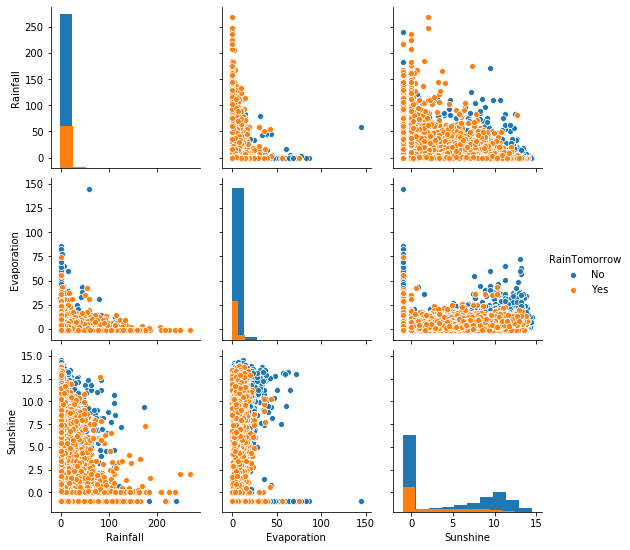

In [12]:
# 选取三个特征与标签组合的散点可视化
sns.pairplot(data=data[['Rainfall',
'Evaporation',
'Sunshine'] + ['RainTomorrow']], diag_kind='hist', hue= 'RainTomorrow')
plt.show()

从上图可以发现，在2D情况下不同的特征组合对于第二天下雨与不下雨的散点分布，以及大概的区分能力。相对的Sunshine与其他特征的组合更具有区分能力。

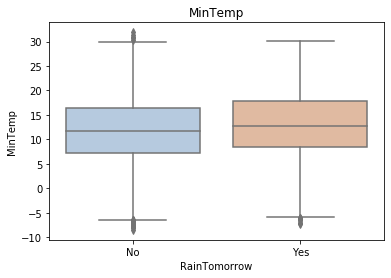

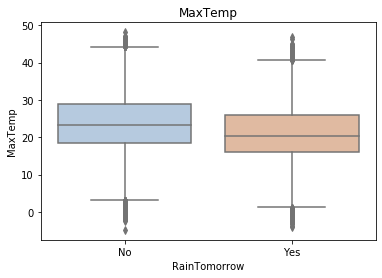

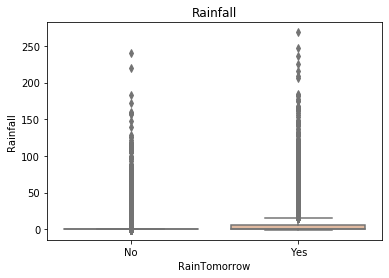

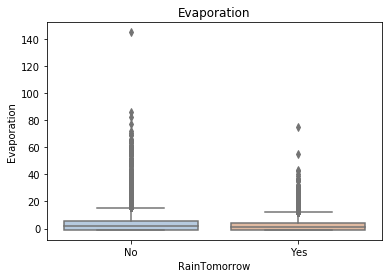

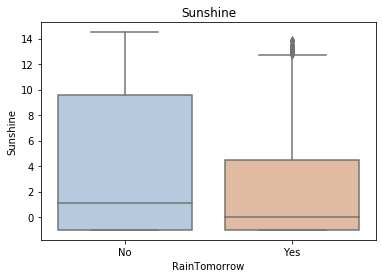

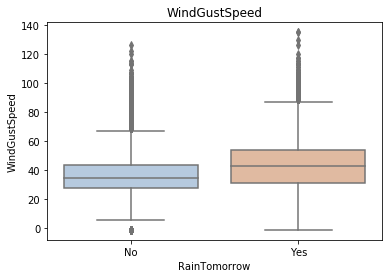

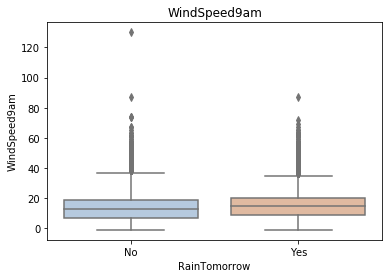

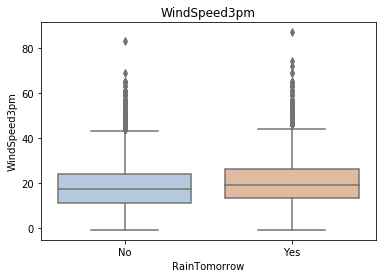

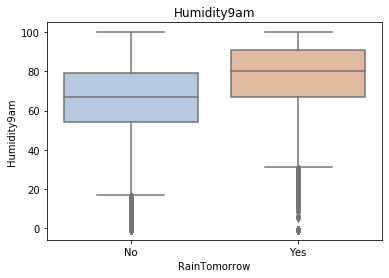

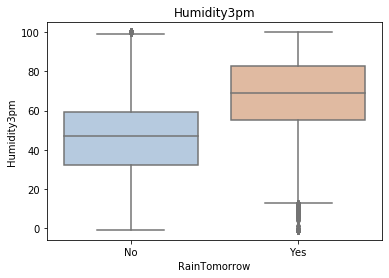

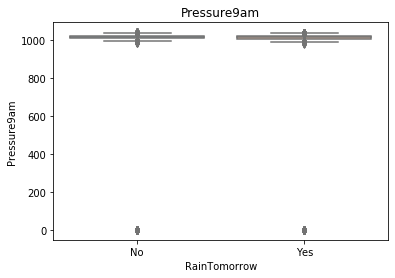

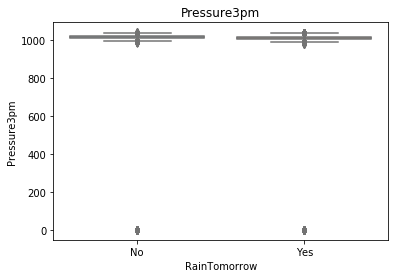

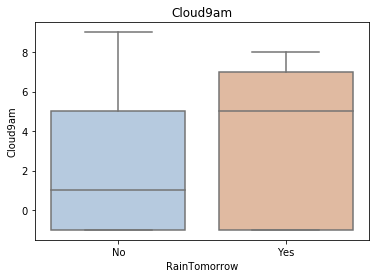

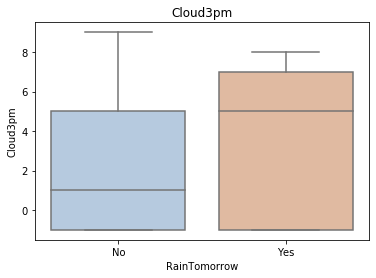

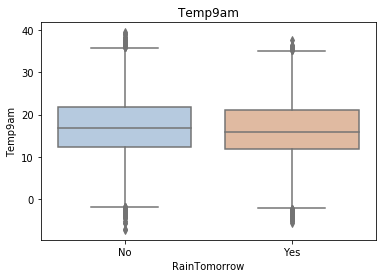

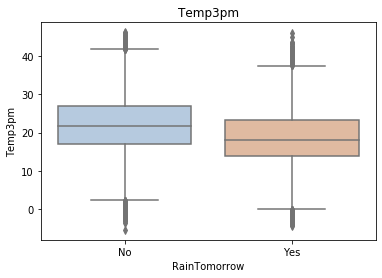

In [13]:
for col in data[numerical_features].columns:
    if col != 'RainTomorrow':
        sns.boxplot(x='RainTomorrow', y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()

利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。我们可以发现Sunshine,Humidity3pm,Cloud9am,Cloud3pm的区分能力较强。

In [16]:
tlog = {}
for i in category_features:
    tlog[i] = data[data['RainTomorrow'] == 'Yes'][i].value_counts()
flog = {}
for i in category_features:
    flog[i] = data[data['RainTomorrow'] == 'No'][i].value_counts()

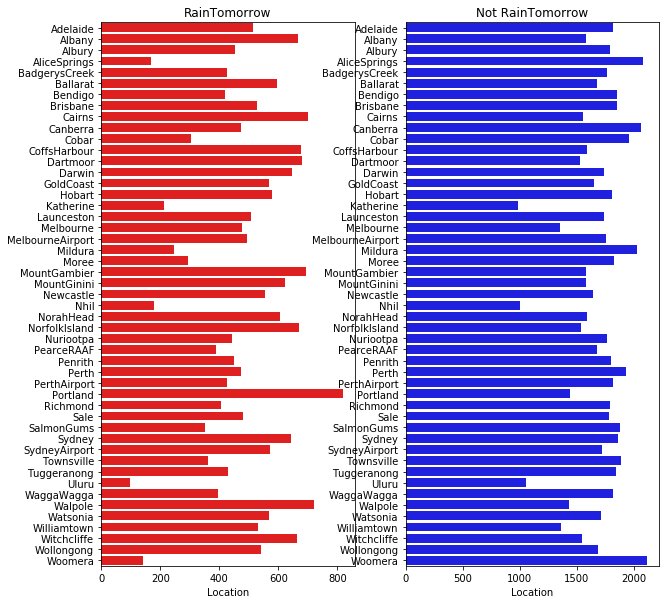

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x = pd.DataFrame(tlog['Location']).sort_index()['Location'], y = pd.DataFrame(tlog['Location']).sort_index().index, color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x = pd.DataFrame(flog['Location']).sort_index()['Location'], y = pd.DataFrame(flog['Location']).sort_index().index, color = "blue")
plt.show()

从上图可以发现不同地区降雨情况差别很大，有些地方明显更容易降雨。

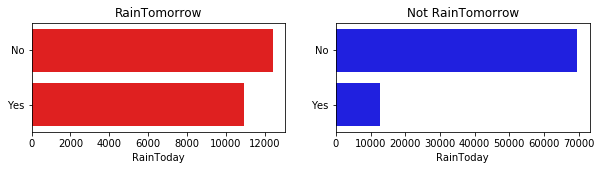

In [18]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.title('RainTomorrow')
sns.barplot(x = pd.DataFrame(tlog['RainToday'][:2]).sort_index()['RainToday'], y = pd.DataFrame(tlog['RainToday'][:2]).sort_index().index, color = "red")
plt.subplot(1,2,2)
plt.title('Not RainTomorrow')
sns.barplot(x = pd.DataFrame(flog['RainToday'][:2]).sort_index()['RainToday'], y = pd.DataFrame(flog['RainToday'][:2]).sort_index().index, color = "blue")
plt.show()

上图我们可以发现，今天下雨明天不一定下雨，但今天不下雨，第二天大概率也不下雨。

# Step5：对离散变量进行编码

由于XGBoost无法处理字符串类型的数据，我们需要一些方法讲字符串数据转化为数据。一种最简单的方法是把所有的相同类别的特征编码成同一个值，例如女=0，男=1，狗狗=2，所以最后编码的特征值是在[0，特征向量-1]之间的整数。除此之外，还有独热编码、求和编码、留一法编码等等方法可以获得更好的效果。

In [19]:
# 把所有的相同类别的特征编码为同一个值
def get_mapfunction(x):
    mapp = dict(zip(x.unique().tolist(),
         range(len(x.unique().tolist()))))
    def mapfunction(y):
        if y in mapp:
            return mapp[y]
        else:
            return -1
    return mapfunction
for i in category_features:
    data[i] = data[i].apply(get_mapfunction(data[i]))

In [22]:
# 编码后的字符串特征变成了数字
data['Location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

# Step6：利用 XGBoost 进行训练与预测

In [30]:
# 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

# 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = data['RainTomorrow']
data_features_part = data[[x for x in data.columns if x != 'RainTomorrow']]

# 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [31]:
# 导入XGBoost模型
from xgboost.sklearn import XGBClassifier
# 定义 XGBoost模型 
clf = XGBClassifier()
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

[15:05:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

The accuracy of the Logistic Regression is: 0.8982476703979371
The accuracy of the Logistic Regression is: 0.8575179333302076
The confusion matrix result:
 [[15656  2142]
 [  897  2634]]


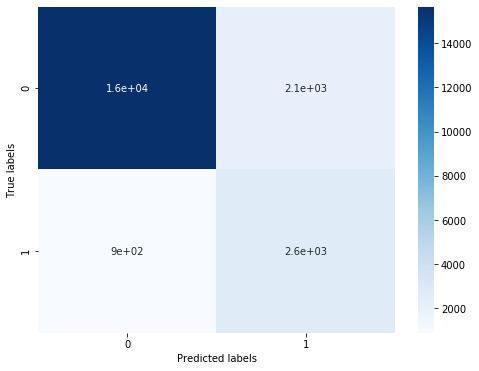

In [32]:
# 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

# 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

# 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

我们可以发现共有15656 + 2634个样本预测正确，2142 + 897个样本预测错误。

# Step7：利用 XGBoost 进行特征选择

XGBoost的特征选择属于特征选择中的嵌入式方法，在XGboost中可以用属性feature_importances_去查看特征的重要度。

In [34]:
? sns.barplot

In [ ]:
"""
Signature:
 sns.barplot(
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x000002325098A8B8>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or more categorical
variables.

It is also important to keep in mind that a bar plot shows only the mean
(or other estimator) value, but in many cases it may be more informative to
show the distribution of values at each level of the categorical variables.
In that case, other approaches such as a box or violin plot may be more
appropriate.


Input data can be passed in a variety of formats, including:

- Vectors of data represented as lists, numpy arrays, or pandas Series
  objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
- A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
  variables will determine how the data are plotted.
- A "wide-form" DataFrame, such that each numeric column will be plotted.
- An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas
objects are preferable because the associated names will be used to
annotate the axes. Additionally, you can use Categorical types for the
grouping variables to control the order of plot elements.    

This function always treats one of the variables as categorical and
draws data at ordinal positions (0, 1, ... n) on the relevant axis, even
when the data has a numeric or date type.

See the :ref:`tutorial <categorical_tutorial>` for more information.    

Parameters
----------
x, y, hue : names of variables in ``data`` or vector data, optional
    Inputs for plotting long-form data. See examples for interpretation.        
data : DataFrame, array, or list of arrays, optional
    Dataset for plotting. If ``x`` and ``y`` are absent, this is
    interpreted as wide-form. Otherwise it is expected to be long-form.    
order, hue_order : lists of strings, optional
    Order to plot the categorical levels in, otherwise the levels are
    inferred from the data objects.        
estimator : callable that maps vector -> scalar, optional
    Statistical function to estimate within each categorical bin.
ci : float or "sd" or None, optional
    Size of confidence intervals to draw around estimated values.  If
    "sd", skip bootstrapping and draw the standard deviation of the
    observations. If ``None``, no bootstrapping will be performed, and
    error bars will not be drawn.
n_boot : int, optional
    Number of bootstrap iterations to use when computing confidence
    intervals.
units : name of variable in ``data`` or vector data, optional
    Identifier of sampling units, which will be used to perform a
    multilevel bootstrap and account for repeated measures design.
seed : int, numpy.random.Generator, or numpy.random.RandomState, optional
    Seed or random number generator for reproducible bootstrapping.    
orient : "v" | "h", optional
    Orientation of the plot (vertical or horizontal). This is usually
    inferred from the dtype of the input variables, but can be used to
    specify when the "categorical" variable is a numeric or when plotting
    wide-form data.    
color : matplotlib color, optional
    Color for all of the elements, or seed for a gradient palette.    
palette : palette name, list, or dict, optional
    Colors to use for the different levels of the ``hue`` variable. Should
    be something that can be interpreted by :func:`color_palette`, or a
    dictionary mapping hue levels to matplotlib colors.    
saturation : float, optional
    Proportion of the original saturation to draw colors at. Large patches
    often look better with slightly desaturated colors, but set this to
    ``1`` if you want the plot colors to perfectly match the input color
    spec.    
errcolor : matplotlib color
    Color for the lines that represent the confidence interval.
errwidth : float, optional
    Thickness of error bar lines (and caps).         
capsize : float, optional
    Width of the "caps" on error bars.

dodge : bool, optional
    When hue nesting is used, whether elements should be shifted along the
    categorical axis.    
ax : matplotlib Axes, optional
    Axes object to draw the plot onto, otherwise uses the current Axes.    
kwargs : key, value mappings
    Other keyword arguments are passed through to
    :meth:`matplotlib.axes.Axes.bar`.

Returns
-------
ax : matplotlib Axes
    Returns the Axes object with the plot drawn onto it.    

See Also
--------
countplot : Show the counts of observations in each categorical bin.    
pointplot : Show point estimates and confidence intervals using scatterplot
            glyphs.    
catplot : Combine a categorical plot with a :class:`FacetGrid`.    

Examples
--------

Draw a set of vertical bar plots grouped by a categorical variable:

.. plot::
    :context: close-figs

    >>> import seaborn as sns
    >>> sns.set(style="whitegrid")
    >>> tips = sns.load_dataset("tips")
    >>> ax = sns.barplot(x="day", y="total_bill", data=tips)

Draw a set of vertical bars with nested grouping by a two variables:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

Draw a set of horizontal bars:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot(x="tip", y="day", data=tips)

Control bar order by passing an explicit order:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot(x="time", y="tip", data=tips,
    ...                  order=["Dinner", "Lunch"])

Use median as the estimate of central tendency:

.. plot::
    :context: close-figs

    >>> from numpy import median
    >>> ax = sns.barplot(x="day", y="tip", data=tips, estimator=median)

Show the standard error of the mean with the error bars:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot(x="day", y="tip", data=tips, ci=68)

Show standard deviation of observations instead of a confidence interval:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot(x="day", y="tip", data=tips, ci="sd")

Add "caps" to the error bars:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot(x="day", y="tip", data=tips, capsize=.2)

Use a different color palette for the bars:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot("size", y="total_bill", data=tips,
    ...                  palette="Blues_d")

Use ``hue`` without changing bar position or width:

.. plot::
    :context: close-figs

    >>> tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
    >>> ax = sns.barplot(x="day", y="total_bill", hue="weekend",
    ...                  data=tips, dodge=False)

Plot all bars in a single color:

.. plot::
    :context: close-figs

    >>> ax = sns.barplot("size", y="total_bill", data=tips,
    ...                  color="salmon", saturation=.5)

Use :meth:`matplotlib.axes.Axes.bar` parameters to control the style.

.. plot::
    :context: close-figs

    >>> ax = sns.barplot("day", "total_bill", data=tips,
    ...                  linewidth=2.5, facecolor=(1, 1, 1, 0),
    ...                  errcolor=".2", edgecolor=".2")

Use :func:`catplot` to combine a :func:`barplot` and a :class:`FacetGrid`.
This allows grouping within additional categorical variables. Using
:func:`catplot` is safer than using :class:`FacetGrid` directly, as it
ensures synchronization of variable order across facets:

.. plot::
    :context: close-figs

    >>> g = sns.catplot(x="sex", y="total_bill",
    ...                 hue="smoker", col="time",
    ...                 data=tips, kind="bar",
    ...                 height=4, aspect=.7);
File:      d:\software\anaconda3\lib\site-packages\seaborn\categorical.py
Type:      function
"""

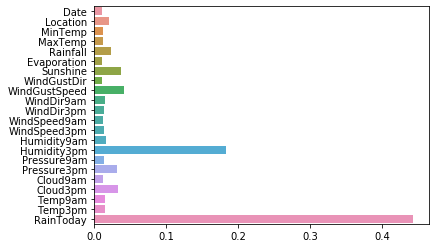

In [36]:
sns.barplot(y=data_features_part.columns, x=clf.feature_importances_)

从图中我们可以发现下午3点的湿度与今天是否下雨是决定第二天是否下雨最重要的因素

初次之外，我们还可以使用XGBoost中的下列重要属性来评估特征的重要性。
- weight:是以特征用到的次数来评价
- gain:当利用特征做划分的时候的评价基尼指数
- cover:利用一个覆盖样本的指标二阶导数（具体原理不清楚有待探究）平均值来划分。
- total_gain:总基尼指数
- total_cover:总覆盖

D:\software\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\software\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


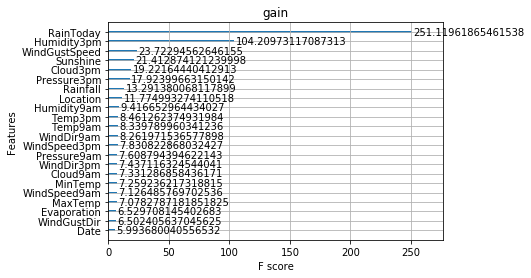

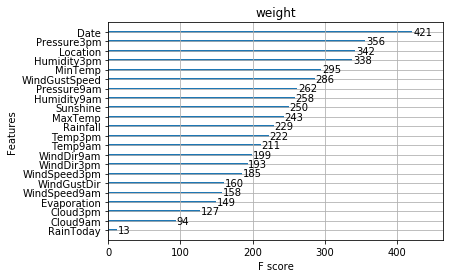

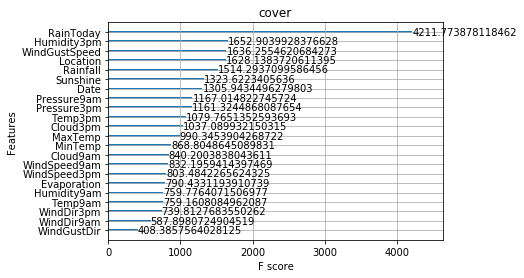

acc= 0.8575179333302076


In [37]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

def estimate(model,data):

    #sns.barplot(data.columns,model.feature_importances_)
    ax1=plot_importance(model,importance_type="gain")
    ax1.set_title('gain')
    ax2=plot_importance(model, importance_type="weight")
    ax2.set_title('weight')
    ax3 = plot_importance(model, importance_type="cover")
    ax3.set_title('cover')
    plt.show()
def classes(data,label,test):
    model=XGBClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model, data)
    return ans
 
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test, ans)
print('acc=',accuracy_score(y_test,ans))

这些图同样可以帮助我们更好的了解其他重要特征。

# Step8：通过调整参数获得更好的效果

XGBoost中包括但不限于下列对模型影响较大的参数：
- learning_rate: 有时也叫作eta，系统默认值为0.3。每一步迭代的步长，很重要。太大了运行准确率不高，太小了运行速度慢。
- subsample：系统默认为1。这个参数控制对于每棵树，随机采样的比例。减小这个参数的值，算法会更加保守，避免过拟合, 取值范围零到一。
- colsample_bytree：系统默认值为1。我们一般设置成0.8左右。用来控制每棵随机采样的列数的占比(每一列是一个特征)。
- max_depth： 系统默认值为6，我们常用3-10之间的数字。这个值为树的最大深度。这个值是用来控制过拟合的。max_depth越大，模型学习的更加具体。

调节模型参数的方法有贪心算法、网格调参、贝叶斯调参等。这里我们采用网格调参，它的基本思想是穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。

In [38]:
# 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV

# 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]

parameters = { 'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree':colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators = 50)

# 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.4min finished
D:\software\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
# 网格搜索后的最好参数为
clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 8,
 'subsample': 0.8}

[15:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\software\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


The accuracy of the Logistic Regression is: 0.9434917658090606
The accuracy of the Logistic Regression is: 0.8577992404707206
The confusion matrix result:
 [[15639  2119]
 [  914  2657]]


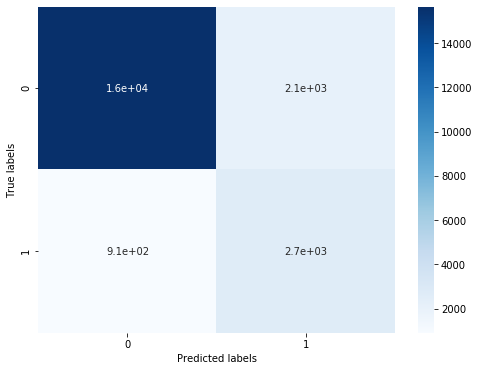

In [40]:
# 在训练集和测试集上分布利用最好的模型参数进行预测

# 定义带参数的 XGBoost模型 
clf = XGBClassifier(colsample_bytree = 0.6, learning_rate = 0.3, max_depth= 8, subsample = 0.9)
# 在训练集上训练XGBoost模型
clf.fit(x_train, y_train)

train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

# 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

# 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

原本有2142 + 897个错误，现在有 2119 + 914个错误，带来了明显的正确率提升。